We have some low quality images containing digits from 0 to 9.\
Training an AI to recognize them is the task.

In [3]:
from sklearn import datasets

In [4]:
digits = datasets.load_digits()

In [39]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [5]:
print(digits.images.shape)
print(digits.keys())

(1797, 8, 8)
dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [19]:
digits.target_names # Target labels 

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [21]:
import matplotlib.pyplot as plt
import numpy as np

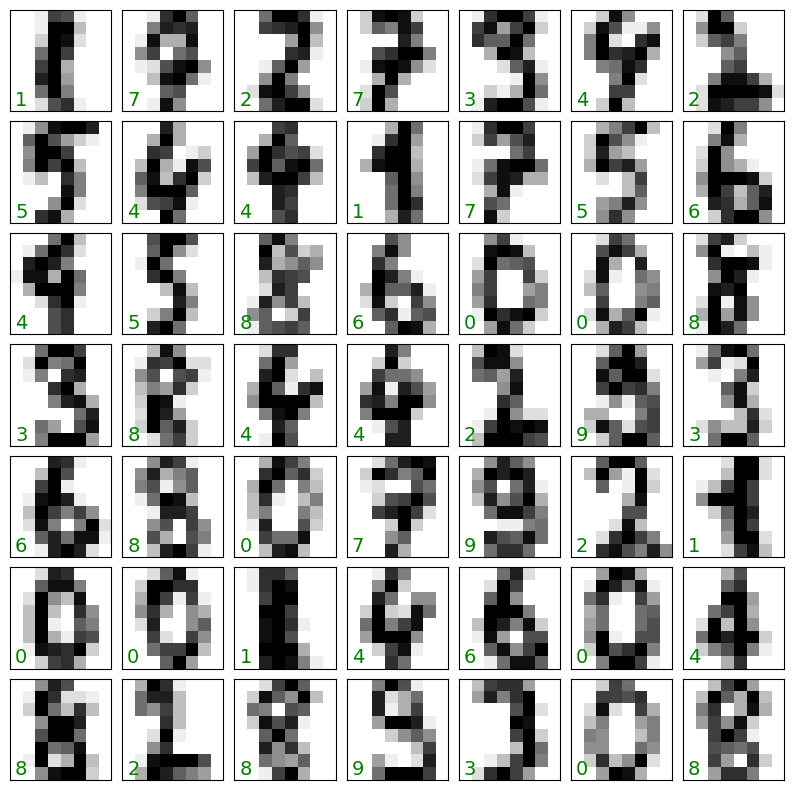

In [22]:
fig, axes = plt.subplots(7,7, figsize=(10, 10))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

np.random.seed(42)
mychoices = np.random.choice(digits.images.shape[0],100)

for i, ax in enumerate(axes.flat):
    ax.imshow((digits.images[mychoices[i]]), 
              cmap='binary')
    ax.text(0.05, 0.05, str(digits.target[mychoices[i]]),transform=ax.transAxes, color='green', fontsize=14)
    ax.set_xticks([])
    ax.set_yticks([])

In [24]:
from sklearn.manifold import Isomap as ISO

In [53]:
embedding = ISO(n_neighbors=5, n_components=2)

In [54]:
X = embedding.fit_transform(digits.data[:100])

In [55]:
X.shape

(100, 2)

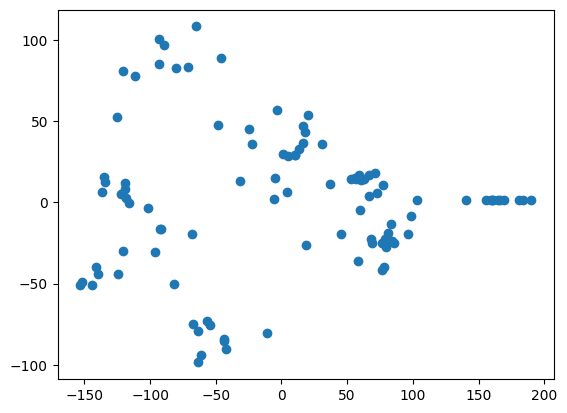

In [56]:
plt.scatter(X[:,0],X[:,1])

In [57]:
from sklearn.model_selection import train_test_split

In [71]:
X_train, X_test, Y_train, Y_test = train_test_split(digits.data, digits.target, train_size=0.5)

In [72]:
from sklearn.linear_model import LogisticRegression

In [73]:
LR = LogisticRegression(solver='sag')

In [74]:
clf = LR.fit(X_train, Y_train)

c:\Users\ricca\Documents\Unimib-Code\AstroStatistics\AML\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [79]:
Y_pred = clf.predict(X_test)

In [88]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [82]:
ACC = accuracy_score(Y_test, Y_pred)

In [87]:
print(f'Accuracy: {ACC:.2f}')

Accuracy: 0.97


In [89]:
confusion_matrix(Y_test, Y_pred)

array([[87,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 87,  0,  0,  1,  0,  0,  0,  0,  2],
       [ 0,  1, 83,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 98,  0,  0,  0,  1,  2,  0],
       [ 0,  1,  0,  0, 77,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  1,  1, 96,  1,  0,  0,  1],
       [ 0,  1,  0,  0,  1,  1, 85,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 91,  0,  1],
       [ 0,  8,  1,  0,  1,  0,  0,  0, 80,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 86]])